# <span style="color:palevioletred"> **Tarea 2 Física Computacional**</span>
#### Dehesa Corona Valeria Carolina
*Elaborado en Jupyter Notebook*


#### Bibliotecas adicionales:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pylab import *

**1. En clase vimos la forma de hacer la integral numérica en la que se aproxima de una función de la siguiente manera $\int_{x_{i}-h}^{x_{i}+h} f(x) dx = \frac{f(x_{i-1})+4f(x_{i})+f(x_{i+1})}{3}h + O(h^{5})$ donde se desprecian los términos $O(h^{5})$. Calcule las integales de las siguientes funciones para una malla uniforme:**

In [2]:
def integral_resto(x,y):
    sum = 0
    for i in range(int((len(x)-1)/2)):
        j = 2*i+1
        sum += ((y[j-1]+4*y[j]+y[j+1])/3)*(x[1]-x[0])
    return sum

In [3]:
def integral_1(x,y):
    #Calculamos utilizando la fórmula de las notas para el primer segmento
    primerintervalo = (x[1]-x[0])/48*(23*y[0]+26*y[1]-4*y[2]+6*y[3]-3*y[4])
    #Removemos la primera entrada y aplicamos la otra función para el resto de los intervalos:
    x = np.delete(x, 0)
    y = np.delete(y, 0)
    return primerintervalo + integral_resto(x,y)

**a) $\int_{0}^{5} e^{-x^2} \sin{10x} dx$**

In [4]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (a)
n = 100
x = np.linspace(0,5,n)
b = np.sin(10*x)
f_a = np.sin(10*x)*np.exp(-(x**2))

int_numerica = integral_1(x,f_a)
print("El valor encontrado por el algoritmo de integral numérica:  ", int_numerica)

El valor encontrado por el algoritmo de integral numérica:   0.10280460982553194


Tenemos que:

$$\int_{0}^{5} e^{-x^2}(\sin{10x}) dx = 0.10213\dots  $$

Por lo que:

In [5]:
valor_inta = 0.10213 #Ocuparemos este redondeo para toda la tarea
print("El valor de la integral es:  ", valor_inta)
print("El valor absoluto de la diferencia (error):", abs((valor_inta - int_numerica)))
print("Como", 10**-4-(valor_inta - int_numerica), "positivo, el error es menor a 10^{-4}")


El valor de la integral es:   0.10213
El valor absoluto de la diferencia (error): 0.000674609825531941
Como 0.0007746098255319411 positivo, el error es menor a 10^{-4}


**b) $\int_{-5}^{5} (e^{-x^2}(\sin{10x}))^{2} dx$**

In [6]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (b)
n = 100
x = np.linspace(-5,5,n)
f_b = (np.sin(10*x)*np.exp(-(x**2)))**2

int_numericb = integral_1(x,f_b)
print("El valor encontrado por el algoritmo de integral numérica:  ", int_numericb)

El valor encontrado por el algoritmo de integral numérica:   0.6266570686577514


Tenemos que:

$$\int_{-5}^{5} (e^{-x^2} \sin{}10x)^2 dx = 0.62665\dots  $$

Por lo que:

In [7]:
valor_intb = 0.62665 #Ocuparemos este redondeo para toda la tarea

print("El valor de la integral es:  ", valor_intb)
print("El valor absoluto de la diferencia (error):", abs((valor_intb - int_numericb)))
print("Como", 10**-4-(valor_intb - int_numericb), "positivo, el error es menor a 10^{-4}")
#Si el último valor no es positivo ,aumentamos n

El valor de la integral es:   0.62665
El valor absoluto de la diferencia (error): 7.068657751352347e-06
Como 0.00010706865775135235 positivo, el error es menor a 10^{-4}


**c)$\int_{0.5}^{5} -\frac{2}{x^{6}} + \frac{1}{x^{12}} dx$**

In [8]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (c)
n = 1000
x = np.linspace(0.5,5,n)
f_c = 1/np.power(x,12) - 2/np.power(x,6)

int_numericc = integral_1(x,f_c)
print("El valor encontrado por el algoritmo de integral numérica:  ", int_numericc)

El valor encontrado por el algoritmo de integral numérica:   173.3859920923636


Tenemos que:

$$\int_{0.5}^{5} -\frac{2}{x^{6}} + \frac{1}{x^{12}} dx  = 173.38193... $$

Por lo que:

In [9]:
valor_intc = 173.38193 #Ocuparemos este redondeo para toda la tarea

print("El valor de la integral es:  ", valor_intc)
print("El valor absoluto de la diferencia (error):", abs((valor_intc - int_numericc)))
print("Como", 10**-4-(valor_intc - int_numericc), "positivo, el error es menor a 10^{-4}")
#Si el último valor no es positivo ,aumentamos n

El valor de la integral es:   173.38193
El valor absoluto de la diferencia (error): 0.004062092363597003
Como 0.004162092363597003 positivo, el error es menor a 10^{-4}


**2. Haga una función que implemente la integral numérica utilizando la regla de &nbsp; "Simpson $\frac{3}{8}$" dada por la relación: $\int_{x_{i}}^{x_{i+3}} = \frac{3h}{8}(f(x_{i}) + 3f(x_{i+1}) + 3f(x_{i+2}) + f(x_{i+3}) + O(h^{5})) $ donde se desprecian los términos $O(h^{5})$. Utilice ese algoritmo para obtener las integrales del problema anterior con una precisión de $10^{-4}$** 

In [10]:
def integralrestoen_tres(x,y):
    sum = 0
    for i in range(int(len(x)//3)):
        j = 3*i 
        sum += (3*(x[1]-x[0])/8)*(y[j]+3*y[j+1]+3*y[j+2]+y[j+3])    
    return sum

In [11]:
def integral_Simpson(x,y):
    sum = 0
    for i in range(int((len(x)-1)%3)): #Utilizamos la fórmula para primeros intervalos
        sum += (x[1]-x[0])/48*(23*y[i]+26*y[i+1]-4*y[i+2]+6*y[i+3]-3*y[i+4])
    #Dividimos para casos donde para poder dividir en grupos de tres en tres, si sobran uno o dos intervalos quitamos las entradas necesarias
    if (len(x)-1)%3 == 1: 
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            return sum + integralrestoen_tres(x,y)
    else: 
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            return sum + integralrestoen_tres(x,y)
    return sum

**a) $\int_{0}^{5} e^{-x^2} dx$**

In [12]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (c)
n = 10000
x = np.linspace(0,5,n)
f_a = np.sin(10*x)*np.exp(-(x**2)) 

int_numericas = integral_Simpson(x,f_a)
print("El valor encontrado por el algoritmo con regla de Simpson:  ", int_numericas)

El valor encontrado por el algoritmo con regla de Simpson:   0.10212907346866221


Ya vimos que:

$$\int_{0}^{5} e^{-x^2}(\sin{10x}) dx = 0.10213\dots  $$

Por lo tanto:

In [13]:
valor_inta = 0.10213 #Ocuparemos este redondeo para toda la tarea
print("El valor de la integral es:  ", valor_inta)
print("El valor absoluto de la diferencia (error):", abs((valor_inta - int_numericas)))
print("Como", 10**-4-(valor_inta - int_numericas), "positivo, el error es menor a 10^{-4}")
#Si el valor no es positivo (como en n=1000), aumentamos n

El valor de la integral es:   0.10213
El valor absoluto de la diferencia (error): 9.265313377915252e-07
Como 9.907346866220848e-05 positivo, el error es menor a 10^{-4}


**b)$\int_{-5}^{5} (e^{-x^2} \sin{}10x)^2 dx$**

In [14]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (b)
n = 100
x = np.linspace(-5,5,n)
f_b = (np.sin(10*x)*np.exp(-(x**2)))**2

int_numericbs = integral_Simpson(x,f_b)
print("El valor encontrado por el algoritmo con regla de Simpson:  ", int_numericbs)

El valor encontrado por el algoritmo con regla de Simpson:   0.6632689323821389


Como ya vimos que:
$$\int_{-5}^{5} (e^{-x^2} \sin{}10x)^2 dx = 0.62665\dots  $$
Por lo tanto:

In [15]:
valor_intb = 0.62665 #Ocuparemos este redondeo para toda la tarea

print("El valor de la integral es:  ", valor_intb)
print("El valor absoluto de la diferencia (error):", abs((valor_intb - int_numericbs)))
print("Como", 10**-4-(valor_intb - int_numericbs), "positivo, el error es menor a 10^{-4}")
#Si el último valor no es positivo ,aumentamos n

El valor de la integral es:   0.62665
El valor absoluto de la diferencia (error): 0.03661893238213887
Como 0.03671893238213887 positivo, el error es menor a 10^{-4}


**c)$\int_{0.5}^{5} -\frac{2}{x^{6}} + \frac{1}{x^{12}} dx$**

In [16]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (c)
n = 15000
x = np.linspace(0.5,5,n)
f_c = 1/np.power(x,12) - 2/np.power(x,6)

int_numericcs = integral_Simpson(x,f_c)
print("El valor encontrado por el algoritmo con regla de Simpson:  ", int_numericcs)

El valor encontrado por el algoritmo con regla de Simpson:   173.3819463755414


Como ya vimos que:

$$\int_{0.5}^{5} -\frac{2}{x^{6}} + \frac{1}{x^{12}} dx  = 173.38193... $$

Por lo tanto:

In [17]:
valor_intc = 173.38193 #Ocuparemos este redondeo para toda la tarea

print("El valor de la integral es:  ", valor_intc)
print("El valor absoluto de la diferencia (error):", abs((valor_intc - int_numericcs)))
print("Como", 10**-4-(valor_intc - int_numericcs), "positivo, el error es menor a 10^{-4}")
#Si el último valor no es positivo ,aumentamos n

El valor de la integral es:   173.38193
El valor absoluto de la diferencia (error): 1.6375541378010894e-05
Como 0.0001163755413780109 positivo, el error es menor a 10^{-4}


**3. Haga una función que implemente la integral numérica utilizando la regla de &nbsp; "Boole" dada por la relación: $\int_{x_{i}}^{x_{i+4}} = \frac{2h}{45}(7f(x_{i}) + 32f(x_{i+1}) + 12f(x_{i+2}) + 32f(x_{i+3}) + 7f(x_{i+4}) +O(h^{7})) $ donde se desprecian los términos $O(h^{7})$. Utilice ese algoritmo para obtener las integrales del problema anterior con una precisión de $10^{-4}$** 

In [18]:
def integral_Boole(x,y):
    #Metemos la condición de intervalos múltiplos de 3
    if (len(x)-1)%4 == 0:    
        return integralrestoen_cuatro(x,y)
    
    else:
        #Una vez más utilizamos la fórmula de las notas para primeros intervalos
        sum = 0
        for i in range(int((len(x)-1)%4)):
            sum += (x[1]-x[0])/48 * (23*y[i]+26*y[i+1]-4*y[i+2]+6*y[i+3]-3*y[i+4])
        ##Dividimos para casos donde para poder dividir en grupos de cuatro en cuatro, si sobran uno o dos o tres intervalos quitamos las entradas necesarias
        if (len(x) - 1) % 4 == 1: 
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            return sum + integralrestoen_cuatro(x,y)
        elif (len(x)-1)%4 == 2: 
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            return sum + integralrestoen_cuatro(x,y)
        else: 
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            return sum + integralrestoen_cuatro(x,y)

In [19]:
def integralrestoen_cuatro(x,y):
    sum = 0
    for i in range(int(len(x)//4)):
        j = 4*i 
        sum = sum + (2*(x[1]-x[0])/45)*(7*y[j]+32*y[j+1]+12*y[j+2]+32*y[j+3]+7*y[j+4])    
    return sum

In [20]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (a)
n = 100
x = np.linspace(0,5,n)
b = np.sin(10*x)
f_a = np.sin(10*x)*np.exp(-(x**2))

int_numericab = integral_Boole(x,f_a)
print("El valor encontrado por el algoritmo con regla de Boole:  ", int_numericab)

El valor encontrado por el algoritmo con regla de Boole:   0.10250251464741647


Sabemos que:

$$\int_{0}^{5} e^{-x^2}(\sin{10x}) dx = 0.10213\dots  $$

Por lo tanto:

In [21]:
valor_inta = 0.10213 #Ocuparemos este redondeo para toda la tarea
print("El valor de la integral es:  ", valor_inta)
print("El valor absoluto de la diferencia (error):", abs((valor_inta - int_numericab)))
print("Como", 10**-4-(valor_inta - int_numericab), "positivo, el error es menor a 10^{-4}")


El valor de la integral es:   0.10213
El valor absoluto de la diferencia (error): 0.000372514647416472
Como 0.000472514647416472 positivo, el error es menor a 10^{-4}


**b) $\int_{-5}^{5} (e^{-x^2}(\sin{10x}))^{2} dx$**

In [22]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (b)
n = 100
x = np.linspace(-5,5,n)
f_b = (np.sin(10*x)*np.exp(-(x**2)))**2

int_numericbb = integral_Boole(x,f_b)
print("El valor encontrado por el algoritmo con regla de Boole:  ", int_numericbb)

El valor encontrado por el algoritmo con regla de Boole:   0.6274863745666805


Sabemos que:

$$\int_{-5}^{5} (e^{-x^2} \sin{}10x)^2 dx = 0.62665\dots  $$

Por lo tanto:

In [23]:
valor_intb = 0.62665 #Ocuparemos este redondeo para toda la tarea

print("El valor de la integral es:  ", valor_intb)
print("El valor absoluto de la diferencia (error):", abs((valor_intb - int_numericbb)))
print("Como", 10**-4-(valor_intb - int_numericbb), "positivo, el error es menor a 10^{-4}")
#Si el último valor no es positivo ,aumentamos n

El valor de la integral es:   0.62665
El valor absoluto de la diferencia (error): 0.0008363745666805089
Como 0.000936374566680509 positivo, el error es menor a 10^{-4}


**c)$\int_{0.5}^{5} -\frac{2}{x^{6}} + \frac{1}{x^{12}} dx$**

In [24]:
#Comenzamos con cierta n suficientemente grande para minimizar el error
#Declaramos cierto arreglo x con valores distribuidos en el dominio de la integral
#Consderamos la función a integrar en inciso (c)
n = 1000
x = np.linspace(0.5,5,n)
f_c = 1/np.power(x,12) - 2/np.power(x,6)

int_numericcb = integral_Boole(x,f_c)
print("El valor encontrado por el algoritmo con regla de Boole:  ", int_numericcb)

El valor encontrado por el algoritmo con regla de Boole:   173.39226515521472


Sabemos que:

$$\int_{0.5}^{5} -\frac{2}{x^{6}} + \frac{1}{x^{12}} dx  = 173.38193... $$

Por lo tanto:

In [25]:
valor_intc = 173.38193 #Ocuparemos este redondeo para toda la tarea

print("El valor de la integral es:  ", valor_intc)
print("El valor absoluto de la diferencia (error):", abs((valor_intc - int_numericcb)))
print("Como", 10**-4-(valor_intc - int_numericcb), "positivo, el error es menor a 10^{-4}")
#Si el último valor no es positivo ,aumentamos n

El valor de la integral es:   173.38193
El valor absoluto de la diferencia (error): 0.010335155214704628
Como 0.010435155214704627 positivo, el error es menor a 10^{-4}


**4. Utilizando la integral del problema 1(a), realice una tabla en el que se mustre la convergencia de los 3 algoritmos aneriores comenzando con $h=0.25$ hasta $h=0.001$. La tabla debe tener por lo menos 30 diferentes h´s. Obtenga el número de puntos en la malla para cada h y haga una gráfica en la que se muestre la convergencoa de los 3 algoritmos. *Número de puntos vs valor de la integral*** 

In [26]:
H = np.linspace(0.25,0.001,30)

Primero = []
Simpson = []
Boole = []
ptos = []
#Inicializamos el contador para llenar con las 30 h´s los arreglos
contador = 0

for h in H:
    x = np.arange(0, 5 + h, h)
    f = np.sin(10*x)*np.exp(-(x**2))
    Primero.append (integral_1(x,f))
    Simpson.append(integral_Simpson(x,f))
    Boole.append(integral_Boole(x,f))
    ptos.append(len(x))  
    contador += 1

#Utilizamos dataframe de pandas para hacer nuestra tabla
data = {'h': H,
        'Primer Algoritmo': Primero,
        'Simpson': Simpson,
        'Boole': Boole,
        'No. de puntos': ptos,
        }

dataframe = pd.DataFrame (data, columns = ['h','Primer Algoritmo','Simpson','Boole', 'No. de puntos'])

print (dataframe) 

           h  Primer Algoritmo   Simpson     Boole  No. de puntos
0   0.250000         -0.050279  0.090654  0.248780             21
1   0.241414         -0.026197  0.034608 -0.058477             22
2   0.232828         -0.003053  0.051123  0.105553             23
3   0.224241          0.016075  0.132926  0.112307             24
4   0.215655          0.030129  0.027064  0.167672             25
5   0.207069          0.039756 -0.005507  0.030905             26
6   0.198483          0.046400  0.114453  0.043520             27
7   0.189897          0.051481 -0.043476  0.114043             28
8   0.181310          0.056022  0.001803  0.135094             29
9   0.172724          0.060629  0.046217  0.071017             30
10  0.164138          0.065582  0.044854  0.080725             32
11  0.155552          0.070916 -0.110182  0.086955             34
12  0.146966          0.076492  0.041907  0.065618             36
13  0.138379          0.082067  0.082110  0.092325             38
14  0.1297

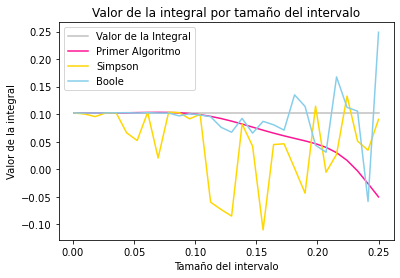

In [27]:
#Gráfica valor de la integral por tamaño del intervalo
valor_inta = 0.10213
ana = np.ones(30) * valor_inta


fig, ax = plt.subplots()
original = ax.plot(H, ana, label='Valor de la Integral', color = "silver")
primer_algor = ax.plot(H, Primero, label='Primer Algoritmo', color = "deeppink")
segundo_algor = ax.plot(H, Simpson, label='Simpson', color = "gold")
tercer_algor = ax.plot(H, Boole, label='Boole', color = "skyblue")
ax.legend()
ax.set_xlabel('Tamaño del intervalo')
ax.set_ylabel('Valor de la integral')
ax.set_title('Valor de la integral por tamaño del intervalo')
plt.show()  

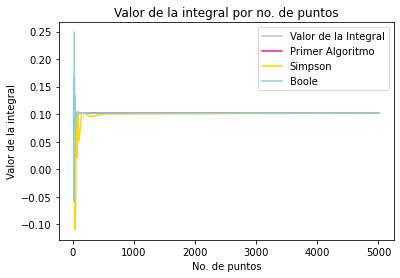

In [28]:
#Cambiamos H por ptos para finalmente graficar el valor de la integral por número de puntos
valor_inta = 0.10213
ana = np.ones(30) * valor_inta


fig, ax = plt.subplots()
original = ax.plot(ptos, ana, label='Valor de la Integral', color = "silver")
primer_algor = ax.plot(ptos, Primero, label='Primer Algoritmo', color = "deeppink")
segundo_algor = ax.plot(ptos, Simpson, label='Simpson', color = "gold")
tercer_algor = ax.plot(ptos, Boole, label='Boole', color = "skyblue")
ax.legend()
ax.set_xlabel('No. de puntos')
ax.set_ylabel('Valor de la integral')
ax.set_title('Valor de la integral por no. de puntos')
plt.show()  